<a href="https://colab.research.google.com/github/MS-H2020/Open/blob/main/tf_ImageDataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/MyDrive/Colab Notebooks/data1.zip" .
!unzip data1.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, # 255で割ることで正規化
                                   zoom_range=0.2, # ランダムにズーム
                                   horizontal_flip = True, # 水平反転
                                   rotation_range = 20, # ランダムに回転
                                   vertical_flip = False, # 垂直反転
                                   featurewise_std_normalization=True,
                                   validation_split = 0.2
                                   )

valid_datagen = ImageDataGenerator(rescale=1./255)
train_dir = './data'

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(256, 256), batch_size=64, class_mode='categorical', shuffle=True)

Found 4238 images belonging to 8 classes.


In [ ]:
train_generator.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7}

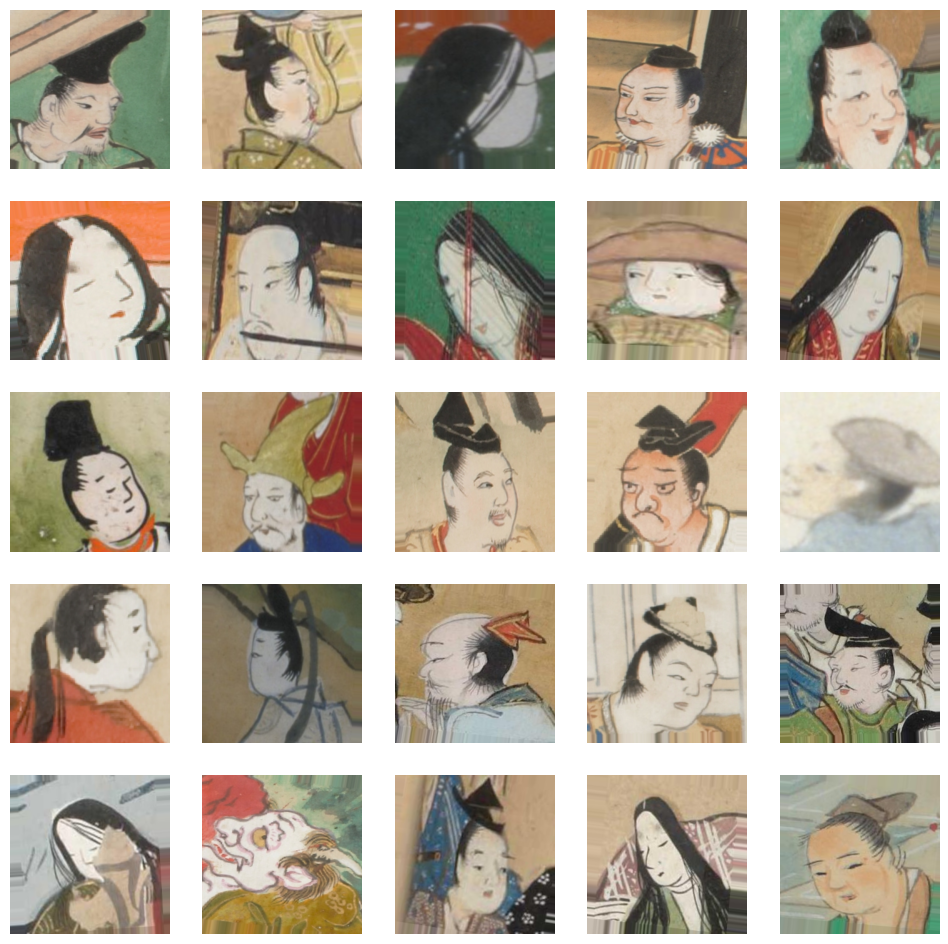

In [ ]:
import matplotlib.pyplot as plt
# 1バッチ分取り出す(64個の画像）
items = next(iter(train_generator))

plt.figure(figsize=(12,12))
for i, image in enumerate(items[0][:25], 1):
    plt.subplot(5,5,i)
    plt.imshow(image)
    plt.axis('off')

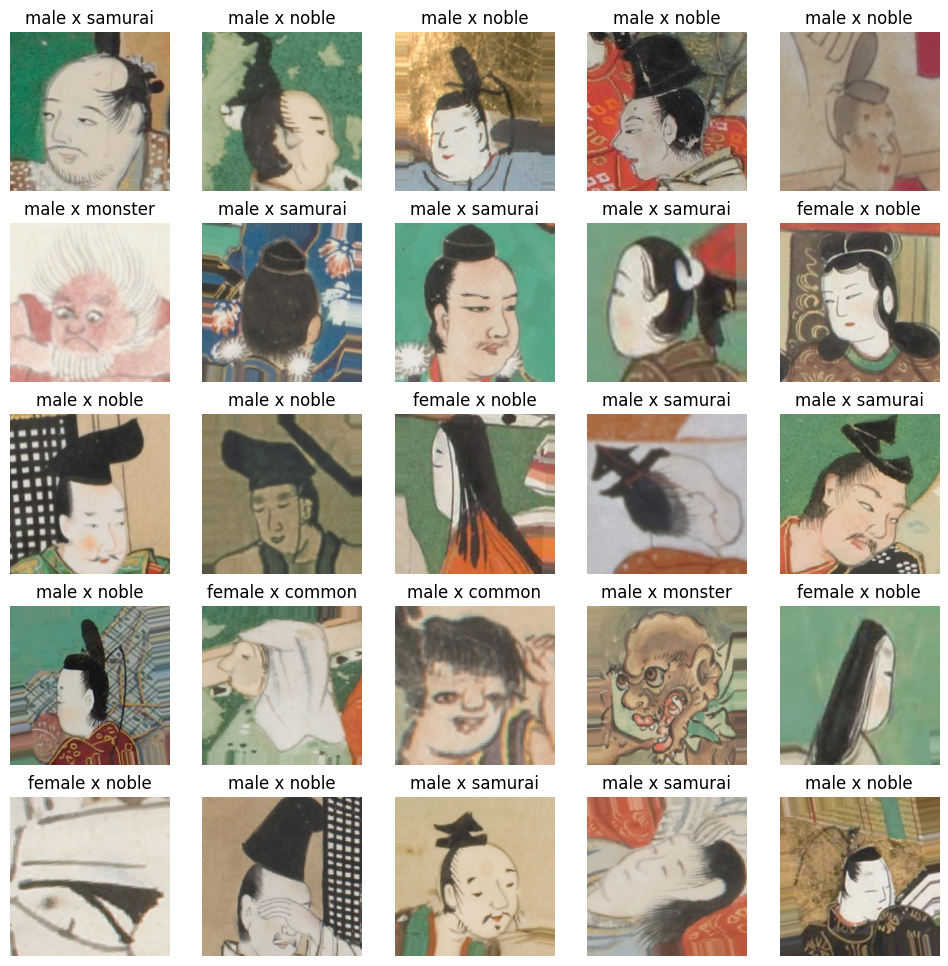

In [ ]:
import numpy as np
# indexからラベル名に戻すための辞書を定義
index2label_dict = {
    0 : 'male x noble',
    1 : 'male x samurai',
    2 : 'male x monster',
    3 : 'male x common',
    4 : 'female x noble',
    5 : 'femele x samurai',
    6 : 'female x monster',
    7 : 'female x common'
}

items = next(iter(train_generator))

plt.figure(figsize=(12,12))
for i, image in enumerate(items[0][:25], 1):
    label_index = np.argmax(items[1][i-1])
    label_name = index2label_dict[label_index]
    plt.subplot(5,5,i)
    plt.imshow(image)
    plt.title(label_name)
    plt.axis('off')